In [1]:
import numpy as np
import scipy.sparse as sparse
import pickle

# Plant dynamic model matrices
A = np.zeros((42,42))
B = np.identity(42)
nx,nu = A.shape[0], B.shape[1]

# MPC settings
# Prediction horizon
npred = 4
# Weighting matrices
Q = (40/npred)*sparse.block_diag([1]*nx)
R = (1/npred)*sparse.block_diag([1]*nu)
# Controller output constraints
dumin, dumax = -0.25*np.ones(nu), 0.25*np.ones(nu)
umin, umax = -2*np.ones(nu), 2*np.ones(nu)

# MPC dictionary
data = {'MPC':{'A':A,'B':B,'Q':Q,'R':R,
              'npred':npred,
               'dumin':dumin,'dumax':dumax,
               'umin':umin,'umax':umax}}
# Pickles MPC data into string representation
with open('MPC.pickle','wb') as f:
    pickle.dump(data,f)

In [2]:
import mpc_driver as mpcCtrl

# Initialize MPC object
AcOshC = mpcCtrl.MPC(A=A,B=B,Q=Q,R=R,npred=npred,
                     dumin=dumin,dumax=dumax,umin=umin,umax=umax,
                     tau=None, tag='MPC',logs=None, delay=0, sampling_rate=1)
AcOshC.init()

# Simulation initial conditions
np.random.seed(19680801)
# State and output
x = np.zeros(nx)#2*np.random.uniform(-1,1,nx)
x[0] = 1e-6;
u = np.zeros(nu)


# Closed-loop simulation
nsim = 12
udt, xdt = np.zeros((nu,nsim)), np.zeros((nx,nsim)) 

for i in range(nsim):
    
    # Save u,y
    udt[:,i] = u
    xdt[:,i] = x
    
    AcOshC.update(x)
    u = np.hstack(AcOshC.output())
    
    # Apply first control input to the plant
    w = -0.0*np.random.uniform(0.95,1.05,A.shape[0])
    x = np.dot(A,x) + np.dot(1.1*B, u) + w
    


AttributeError: 'Logger' object has no attribute 'DEBUG'

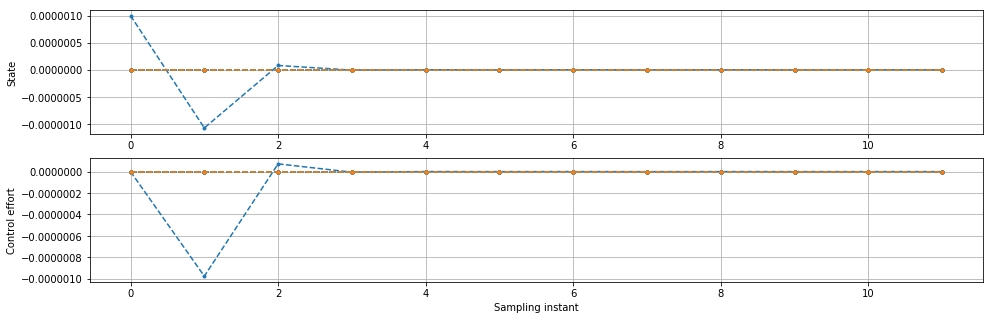

In [5]:
# Plot results
import matplotlib.pyplot as plt

kt = np.arange(0,nsim)

plt.figure(figsize=(16,5))
plt.subplot(211)
for k in range(nx):
    plt.plot(kt,xdt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('State')
    
plt.subplot(212)
for k in range(nu):
    plt.plot(kt,udt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('Control effort')
    plt.xlabel('Sampling instant')

plt.show()